In [2]:
%matplotlib inline
import matplotlib
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sys import path
import h5py
from sys import path
path.append("/home/hkli/work/mylib/")
import plot_tool

In [3]:
fmt='%2.f%%'
fig_x = 9
fig_y = fig_x*4/6
fonts = 20
xy_lb_size = 22
xy_tick_size = xy_lb_size - 5
legend_size =xy_tick_size - 4
axis_linewidth = 2
plt_line_width = 2
cap_size = 5
tick_len = 6
matplotlib.style.use('default')
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rc( 'text', usetex=True)
# plt.rc( 'font', family='serif')

/mnt/ddnfs/data_users/hkli/simu_test1/result/cuts/sym/sex2_1.5/flux2_ex1/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test1/result/cuts/sym/sex2_1.5/mag_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test1/result/cuts/sym/sex2_1.5/flux2_ex5/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test1/result/cuts/sym/sex2_1.5/sex_snr/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test1/result/cuts/sym/sex2_1.5/snr_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/result/cuts/sym/sex2_1.5/flux2_ex1/total.hdf5
/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/result/cuts/sym/sex2_1.5/mag_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/result/cuts/sym/sex2_1.5/flux2_ex5/total.hdf5
/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/result/cuts/sym/sex2_1.5/sex_snr/total.hdf5
/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/result/cuts/sym/sex2_1.5/snr_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/result/cuts/sym/sex2_1.5/flux2_ex1

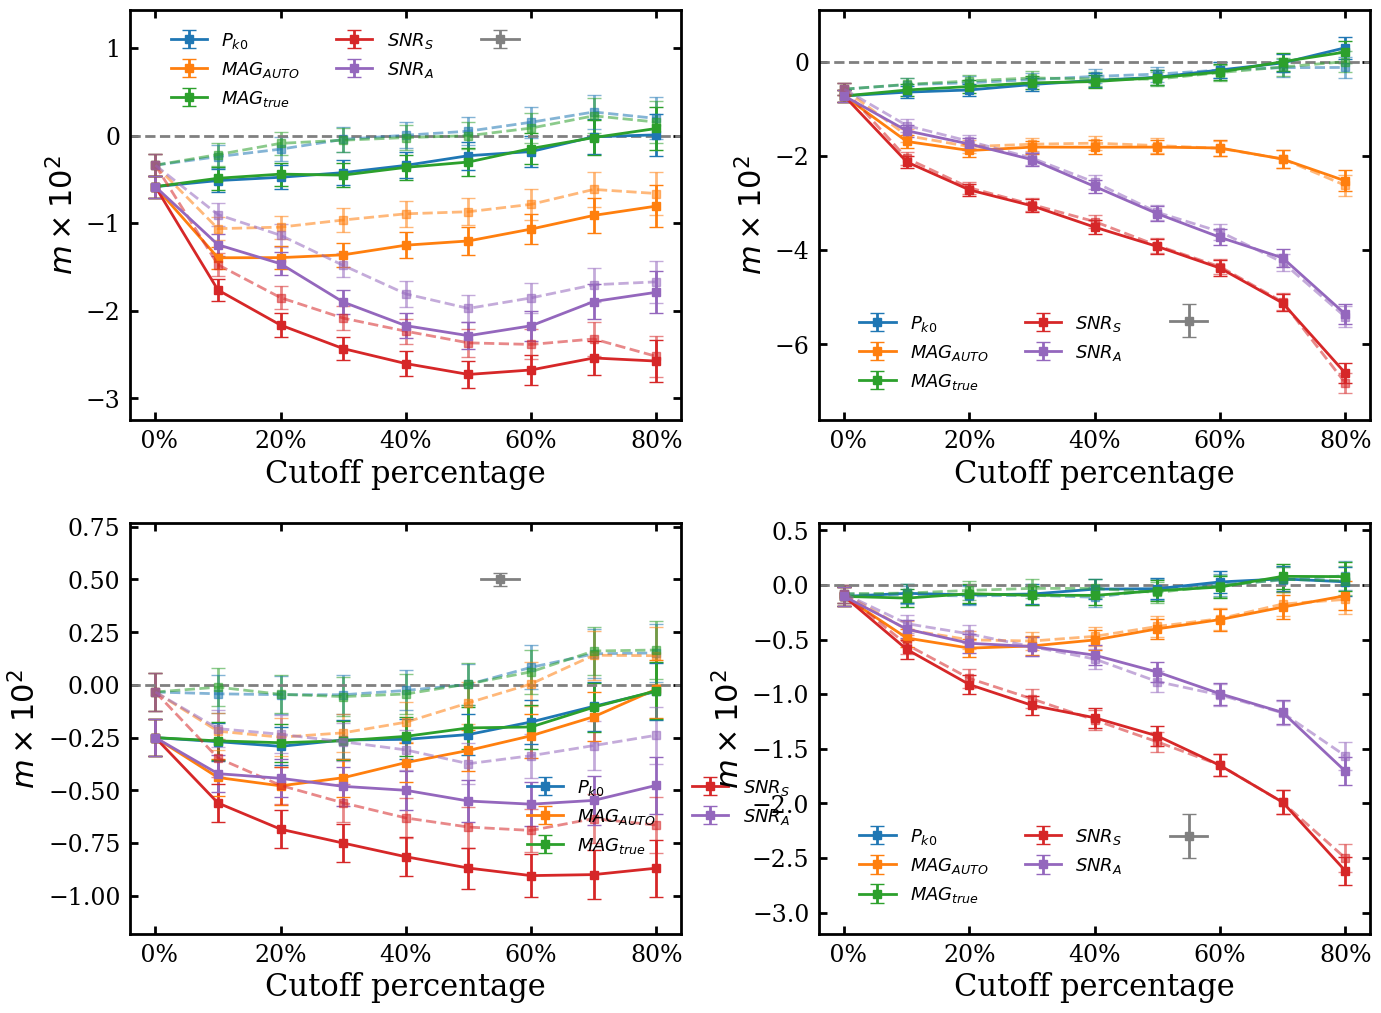

In [40]:
#  the m & c of point source
source_b_p = "simu_test1"
source_f_p = "simu_test"
# the bright source
data_path_p1 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_b_p
# the faint source
data_path_p2 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_f_p

source_b_gal = "selection_bias_real_dimmer"
source_f_gal = "selection_bias_real_dimmer_m"
# the bright source
data_path_g1 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_b_gal
# the faint source
data_path_g2 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_f_gal

names = ["$P_{k0}$", "$MAG_{AUTO}$", "$MAG_{true}$", "$SNR_S$", "$SNR_A$"]
files = ["flux2_ex1","mag_auto", "flux2_ex5","sex_snr","snr_auto"]
ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = [i for i in range(ch_num)]
ylabels = ["$m \\times 10^2$", "$m \\times 10^2$", "$m \\times 10^2$", "$m \\times 10^2$"]

# figs = (fig_x*2, fig_y*2)
xticks = mtick.FormatStrFormatter(fmt)
# fig = plt.figure(figsize=figs)
# plt.rc( 'text', usetex=True)
# plt.rc( 'font', family='serif')

x_sca = [55,55, 55, 55]
y_sca = [1.1, -5.5, 0.5, -2.3]
errs = [ 0.1, 0.35, 0.03, 0.2]
dys = [(-0.2, 0.8), (-0.2, 0.2), (-0.1, 0.4), (-0.3, 0.2)]
legend_pos = [ (0.58, 0.72), (0.58, 0.3), (0.69, 0.42), (0.58, 0.3)]
img = plot_tool.Image_Plot()
img.create_subfig(2,2)
for j in range(4):
    row, col = divmod(j, 2)
    for i in range(len(files)):
        if col == 0:
#             bright source
            if row == 0:
                h5f = h5py.File(data_path_p1+files[i]+"/total.hdf5","r")
                print(data_path_p1+files[i]+"/total.hdf5")
            else:
                h5f = h5py.File(data_path_g1+files[i]+"/total.hdf5","r")
                print(data_path_g1+files[i]+"/total.hdf5")
        else:
#             faint source
            if row == 0:
                h5f = h5py.File(data_path_p2+files[i]+"/total.hdf5","r")
                print(data_path_g1+files[i]+"/total.hdf5")
            else:
                h5f = h5py.File(data_path_g2+files[i]+"/total.hdf5","r")
                print(data_path_g2+files[i]+"/total.hdf5")
                
        mc1 = h5f["/mc1"].value[:,ch]
        mc2 = h5f["/mc2"].value[:,ch]
        h5f.close()
        
        img.axs[row][col].errorbar(x_coord, 100*mc1[0], 100*mc1[1], c="C%d"%i, linewidth=plt_line_width,
            capsize=cap_size, label=names[i], marker="s")
        img.axs[row][col].errorbar(x_coord, 100*mc2[0], 100*mc1[1], c="C%d"%i, linewidth=plt_line_width,
            capsize=cap_size, linestyle="--",alpha=0.55, marker="s")
        

    xs = img.axs[row][col].set_xlim()
    ys = img.axs[row][col].set_ylim()
    img.axs[row][col].plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
    img.axs[row][col].set_xlim(xs[0], xs[1])
    img.axs[row][col].set_ylim(ys[0] + dys[j][0], ys[1]+ dys[j][1])
    
    img.axs[row][col].errorbar(x_sca[j], y_sca[j], errs[j], c="grey",marker="s", capsize=cap_size,linewidth=plt_line_width)
    img.axs[row][col].plot([x_sca[j]-3, x_sca[j]+3], [y_sca[j], y_sca[j]], c="grey",linewidth=plt_line_width)
    
    img.axs[row][col].xaxis.set_major_formatter(xticks)    
    img.axs[row][col].set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
    img.axs[row][col].set_ylabel(ylabels[j], fontsize=xy_lb_size)
    img.axs[row][col].legend(ncol=2, loc="best", fontsize=legend_size , bbox_to_anchor=legend_pos[j], frameon=False)
plt.subplots_adjust(hspace=0.25,  wspace=0.25)
plt.savefig("/home/hkli/work/jupyter_run/pic/pts_mc_.pdf",bbox_inches='tight')
plt.show()

# figs = (fig_x*2, fig_y*2)
# xticks = mtick.FormatStrFormatter(fmt)
# fig = plt.figure(figsize=figs)
# # plt.rc( 'text', usetex=True)
# # plt.rc( 'font', family='serif')

# dys = [(-0.2, 1.2), (-0.2, 1.2), (-0.4, 0.5), (-0.4, 0.5)]
# legend_pos = [ (0.69, 0.62), (0.69, 0.62), (0.69, 0.42), (0.69, 0.42)]
# for j in range(4):
    
#     row, col = divmod(j, 2)
    
#     ax = fig.add_subplot(221+j)
#     ax.tick_params(direction='in', labelsize=xy_tick_size, top=True, right=True, pad=7)
#     for axis in ["bottom", "left", "top", "right"]:
#         # the line width of the frame
#         ax.spines[axis].set_linewidth(axis_linewidth)
#     ax.xaxis.set_tick_params(which="both",direction="in",length=tick_len, width=axis_linewidth)
#     ax.yaxis.set_tick_params(which="major",direction="in",length=tick_len, width=axis_linewidth)
#     ax.yaxis.set_tick_params(which="minor",direction="in",length=tick_len-2, width=axis_linewidth)
    
#     for i in range(len(files)):
#         if row == 0:
# #             bright source
#             data = numpy.load(data_path_1+files[i]+"/total.npz")
#         else:
# #             faint source
#             data = numpy.load(data_path_2+files[i]+"/total.npz")
#         mc = data['arr_%d'%col][:, ch]

#         ax.errorbar(x_coord, 100*(mc[0] - 1), 100*mc[1], c="C%d"%i, linewidth=plt_line_width,
#             capsize=cap_size, label=names[i], marker="s")

#     xs = ax.set_xlim()
#     ys = ax.set_ylim()
#     ax.plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
#     ax.set_xlim(xs[0], xs[1])
#     ax.set_ylim(ys[0] + dys[j][0], ys[1]+ dys[j][1])
#     ax.xaxis.set_major_formatter(xticks)    
#     ax.set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
#     ax.set_ylabel(ylabels[j], fontsize=xy_lb_size)
#     ax.legend(ncol=2, loc="best", fontsize=legend_size , bbox_to_anchor=legend_pos[j], frameon=False)
# plt.subplots_adjust(hspace=0.25,  wspace=0.25)
# plt.savefig("/home/hkli/work/jupyter_run/pic/pts_mc.pdf",bbox_inches='tight')
# plt.show()

[0, 20, 40, 60, 80]
sex2_1.5 mag_auto
sex4_1.5 mag_auto
sex2_4 mag_auto
sex4_4 mag_auto


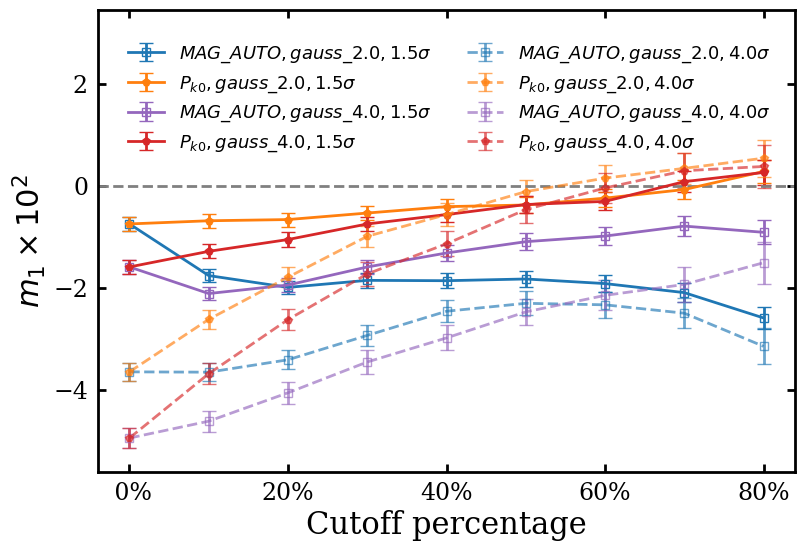

In [62]:
#  the m & c of different filters from point source
source_b = "simu_test1_paper"
source_f = "simu_test_paper"
# the bright source
data_path_1 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/"%source_b
# the faint source
data_path_2 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/"%source_f
sex_filters = ["sex2_1.5","sex4_1.5", "sex2_4","sex4_4"]
names = ["$P_{k0}$", "$MAG_{AUTO}$", "$MAG_{true}$", "$SNR_S$", "$SNR_A$"]
files = "mag_auto"
ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = [i for i in range(ch_num)]
ylabels = ["$m_1 \\times 10^2$", "$m_2 \\times 10^2$", "$m_1 \\times 10^2$", "$m_2 \\times 10^2$"]

x_tick = [i * cuts_num for i in range(0,ch_num,2)]
print(x_tick)

figs = (fig_x, fig_y)
xticks = mtick.FormatStrFormatter(fmt)
fig = plt.figure(figsize=figs)
dys = (-0.1, 0.46)
legend_pos = (0.02, 0.96)
plt_line_width = 2
col = 0
ax = fig.add_subplot(111)
ax.tick_params(direction='in', labelsize=xy_tick_size, top=True, right=True, pad=7)
for axis in ["bottom", "left", "top", "right"]:
    # the line width of the frame
    ax.spines[axis].set_linewidth(axis_linewidth)
ax.xaxis.set_tick_params(which="both",direction="in",length=tick_len, width=axis_linewidth)
ax.yaxis.set_tick_params(which="major",direction="in",length=tick_len, width=axis_linewidth)
ax.yaxis.set_tick_params(which="minor",direction="in",length=tick_len-2, width=axis_linewidth)

gauss_size = [2,4,2,4]
sig_scale = [1.5,1.5,4,4]
color = ["C0","C4", "C1","C3"]
for tag, filter_name in enumerate(sex_filters):
    print(filter_name,files)
    if tag < 2:
        data = numpy.load(data_path_2+"%s/%s/total.npz"%(filter_name, files))
        lb = "$MAG\_AUTO, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = data['arr_%d'%col][:, ch]
        ax.errorbar(x_coord, 100*(mc[0] - 1), 100*mc[1], c=color[tag], linewidth=plt_line_width,
            capsize=cap_size, label=lb, marker="s",fillstyle="none")
        
        data = numpy.load(data_path_2+"%s/flux2_ex1/total.npz"%filter_name)
        lb = "$P_{k0}, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = data['arr_%d'%col][:, ch]
        ax.errorbar(x_coord, 100*(mc[0] - 1), 100*mc[1], c=color[tag+2], linewidth=plt_line_width,
            capsize=cap_size, label=lb, marker="p")
    else:
        data = numpy.load(data_path_2+"%s/%s/total.npz"%(filter_name, files))
        lb = "$MAG\_AUTO, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = data['arr_%d'%col][:, ch]
        ax.errorbar(x_coord, 100*(mc[0] - 1), 100*mc[1], c=color[tag-2], linewidth=plt_line_width,
            capsize=cap_size, label=lb, marker="s", linestyle="--",alpha=0.65,fillstyle="none")
                
        data = numpy.load(data_path_2+"%s/flux2_ex1/total.npz"%filter_name)
        lb = "$P_{k0}, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = data['arr_%d'%col][:, ch]
        ax.errorbar(x_coord, 100*(mc[0] - 1), 100*mc[1], c=color[tag], linewidth=plt_line_width,
            capsize=cap_size, label=lb, marker="p", linestyle="--",alpha=0.65)

xs = ax.set_xlim()
ys = ax.set_ylim(-5.5,3)
ax.plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
ax.set_xlim(xs[0], xs[1])
ax.set_ylim(ys[0] + dys[0], ys[1]+ dys[1])
ax.xaxis.set_major_formatter(xticks)    
ax.set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
ax.set_ylabel(ylabels[col], fontsize=xy_lb_size)
ax.set_xticks(x_tick)
ax.legend(ncol=2, loc="upper left", fontsize=legend_size , bbox_to_anchor=legend_pos, frameon=False)
plt.savefig("/home/hkli/work/jupyter_run/pic/pts_filters_f_m1.pdf",bbox_inches='tight')
plt.show()

[0, 20, 40, 60, 80]
sex2_1.5 mag_auto
sex4_1.5 mag_auto
sex2_4 mag_auto
sex4_4 mag_auto


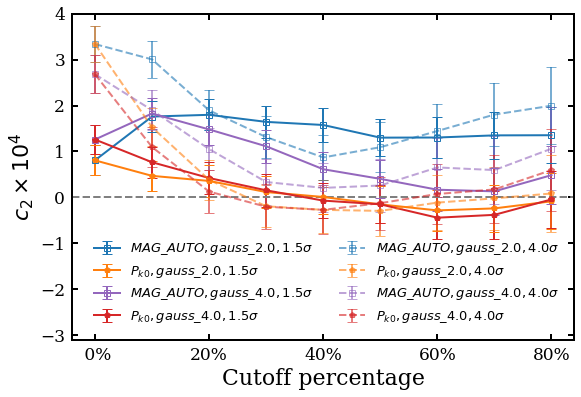

In [82]:
#  the m & c of different filters from point source
source_b = "simu_test_ellip_psf"

# the bright source
data_path_1 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/"%source_b

sex_filters = ["sex2_1.5","sex4_1.5", "sex2_4","sex4_4"]
names = ["$P_{k0}$", "$MAG_{AUTO}$", "$MAG_{true}$", "$SNR_S$", "$SNR_A$"]
files = "mag_auto"
ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = [i for i in range(ch_num)]
ylabels = ["$c_1 \\times 10^4$", "$c_2 \\times 10^4$", "$c_1 \\times 10^4$", "$c_2 \\times 10^4$"]

x_tick = [i * cuts_num for i in range(0,ch_num,2)]
print(x_tick)

figs = (fig_x, fig_y)
xticks = mtick.FormatStrFormatter(fmt)
fig = plt.figure(figsize=figs)
dys = (-0.1, 0.46)
legend_pos = (0.02, 0.01)
plt_line_width = 2
col = 0
ax = fig.add_subplot(111)
ax.tick_params(direction='in', labelsize=xy_tick_size, top=True, right=True, pad=7)
for axis in ["bottom", "left", "top", "right"]:
    # the line width of the frame
    ax.spines[axis].set_linewidth(axis_linewidth)
ax.xaxis.set_tick_params(which="both",direction="in",length=tick_len, width=axis_linewidth)
ax.yaxis.set_tick_params(which="major",direction="in",length=tick_len, width=axis_linewidth)
ax.yaxis.set_tick_params(which="minor",direction="in",length=tick_len-2, width=axis_linewidth)

gauss_size = [2,4,2,4]
sig_scale = [1.5,1.5,4,4]
color = ["C0","C4", "C1","C3"]

for tag, filter_name in enumerate(sex_filters):
    print(filter_name,files)
    if tag < 2:
        h5f = h5py.File(data_path_1+"%s/%s/total.hdf5"%(filter_name, files))
        lb = "$MAG\_AUTO, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = h5f['/mc2'].value[:,ch]
        ax.errorbar(x_coord, 10000*mc[2], 10000*mc[3], c=color[tag], linewidth=plt_line_width,
                    capsize=cap_size, label=lb, marker="s",fillstyle="none")
        h5f.close()
        
        h5f = h5py.File(data_path_1+"%s/flux2_ex1/total.hdf5"%filter_name)
        lb = "$P_{k0}, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = h5f['/mc2'].value[:,ch]
        ax.errorbar(x_coord, 10000*mc[2], 10000*mc[3], c=color[tag+2], linewidth=plt_line_width, capsize=cap_size, label=lb, marker="p")
        h5f.close()
    else:
        h5f = h5py.File(data_path_1+"%s/%s/total.hdf5"%(filter_name, files))
        lb = "$MAG\_AUTO, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = h5f['/mc2'].value[:,ch]
        ax.errorbar(x_coord, 10000*mc[2], 10000*mc[3], c=color[tag-2], linewidth=plt_line_width,
            capsize=cap_size, label=lb, marker="s", linestyle="--",alpha=0.6,fillstyle="none")
        h5f.close()
        
        h5f = h5py.File(data_path_1+"%s/flux2_ex1/total.hdf5"%filter_name)
        lb = "$P_{k0}, gauss\_{%.1f}, %.1f\sigma$"%(gauss_size[tag], sig_scale[tag])
        mc = h5f['/mc2'].value[:,ch]
        ax.errorbar(x_coord, 10000*mc[2], 10000*mc[3], c=color[tag], linewidth=plt_line_width,
            capsize=cap_size, label=lb, marker="p", linestyle="--",alpha=0.6)
        h5f.close()
xs = ax.set_xlim()
ys = ax.set_ylim(-3.1,4)
ax.plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
ax.set_xlim(xs[0], xs[1])
# ax.set_ylim(ys[0] + dys[0], ys[1]+ dys[1])
ax.xaxis.set_major_formatter(xticks)    
ax.set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
ax.set_ylabel(ylabels[3], fontsize=xy_lb_size)
ax.set_xticks(x_tick)
ax.legend(ncol=2, loc="lower left", fontsize=legend_size ,bbox_to_anchor=legend_pos,  frameon=False)
plt.savefig("/home/hkli/work/jupyter_run/pic/pts_filters_f_c2.pdf",bbox_inches='tight')
plt.show()

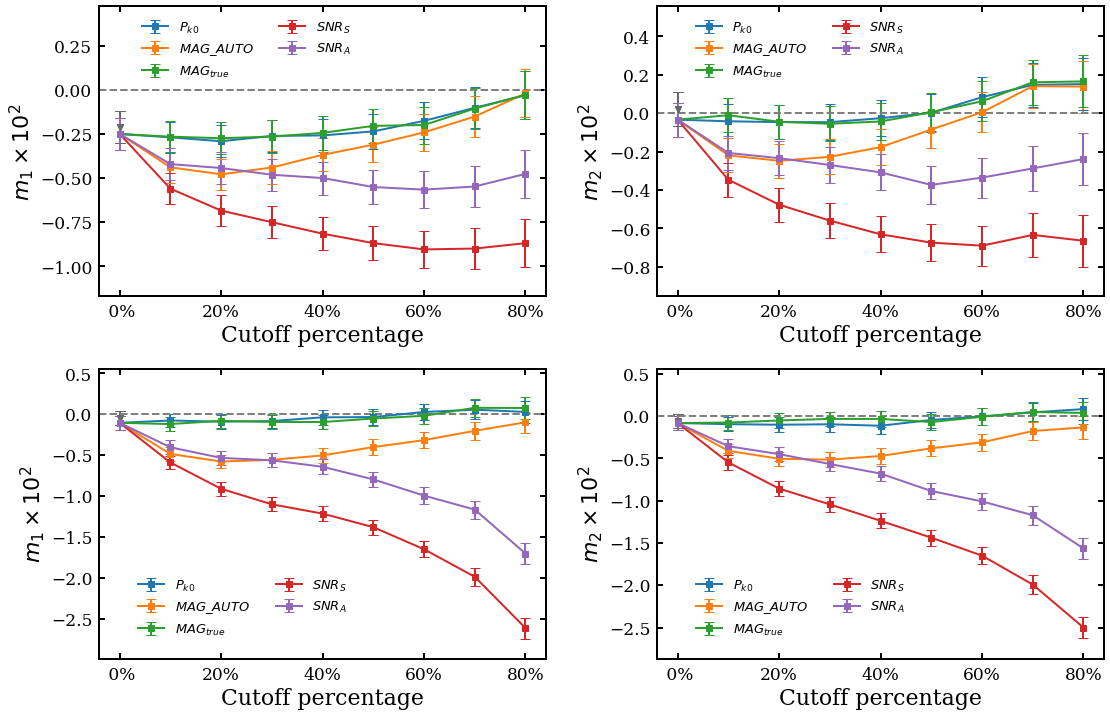

In [152]:
#  the m & c of galsim source
source_b = "selection_bias_real_dimmer"
source_f = "selection_bias_real_dimmer_m"
# the bright source
total_path_1 = "/mnt/ddnfs/data_users/hkli/%s/result/"%source_b
data_path_1 = total_path_1 + "cuts/sym/sex2_1.5/"
# the faint source
total_path_2 = "/mnt/ddnfs/data_users/hkli/%s/result/"%source_f
data_path_2 =  total_path_2 + "cuts/sym/sex2_1.5/"
names = ["$P_{k0}$", "$MAG\_AUTO$", "$MAG_{true}$", "$SNR_S$", "$SNR_A$"]
files = ["flux2_ex1","mag_auto", "flux2_ex5","sex_snr","snr_auto"]
ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = [i for i in range(ch_num)]
ylabels = ["$m_1 \\times 10^2$", "$m_2 \\times 10^2$", "$m_1 \\times 10^2$", "$m_2 \\times 10^2$"]


figs = (fig_x*2, fig_y*2)
xticks = mtick.FormatStrFormatter(fmt)
fig = plt.figure(figsize=figs)
dys = [(-0.1, 0.3), (-0.1, 0.2), (-0.1, 0.2), (-0.1, 0.2)]
legend_pos = [ (0.07, 0.71), (0.06, 0.71), (0.58, 0.32), (0.58, 0.32)]
for j in range(4):
    
    row, col = divmod(j, 2)
    
    ax = fig.add_subplot(221+j)
    ax.tick_params(direction='in', labelsize=xy_tick_size, top=True, right=True, pad=7)
    for axis in ["bottom", "left", "top", "right"]:
        # the line width of the frame
        ax.spines[axis].set_linewidth(axis_linewidth)
    ax.xaxis.set_tick_params(which="both",direction="in",length=tick_len, width=axis_linewidth)
    ax.yaxis.set_tick_params(which="major",direction="in",length=tick_len, width=axis_linewidth)
    ax.yaxis.set_tick_params(which="minor",direction="in",length=tick_len, width=axis_linewidth)
    
    for i in range(len(files)):
        if row == 0:
#             bright source
            h5f = h5py.File(data_path_1+files[i]+"/total.hdf5")
            h5f_all = h5py.File(total_path_1 + "data/shear_result.hdf5")

        else:
#             faint source
            h5f = h5py.File(data_path_2+files[i]+"/total.hdf5")
            h5f_all = h5py.File(total_path_2 + "data/shear_result.hdf5")

       
        mc = h5f['/mc%d'%(col+1)].value[:, ch]
        h5f.close()
        
        mc_all = h5f_all["/mc%d"%(col+1)].value
        h5f_all.close()
        
        ax.errorbar(x_coord[0], mc_all[2]*100, mc_all[3]*100, c="dimgray", linewidth=plt_line_width,
                capsize=cap_size,marker="v")
        ax.errorbar(x_coord, 100*mc[0], 100*mc[1], c="C%d"%i, linewidth=plt_line_width,
                capsize=cap_size, label=names[i], marker="s")

    xs = ax.set_xlim()
    ys = ax.set_ylim()
    ax.plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
    ax.set_xlim(xs[0], xs[1])
    ax.set_ylim(ys[0] + dys[j][0], ys[1]+ dys[j][1])
    ax.xaxis.set_major_formatter(xticks)    
    ax.set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
    ax.set_ylabel(ylabels[j], fontsize=xy_lb_size)
    ax.legend(ncol=2, loc="best", fontsize=legend_size , bbox_to_anchor=legend_pos[j], frameon=False)

plt.subplots_adjust(hspace=0.25,  wspace=0.25)
plt.savefig("/home/hkli/work/jupyter_run/pic/gal_mc.pdf",bbox_inches='tight')
plt.show()

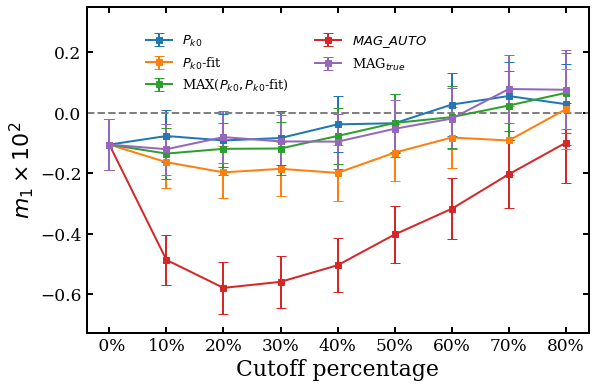

In [155]:
#  comparison of m & c of  Pk0

source_b = "selection_bias_real_dimmer"
source_f = "selection_bias_real_dimmer_m"
# # the bright source
# data_path_1 = "/mnt/ddnfs/data_users/hkli/selection_bias_64_20_25/result/cuts/sym/sex2_1.5/"
# # the faint source
# data_path_2 = "/mnt/ddnfs/data_users/hkli/selection_bias_64_1/result/cuts/sym/sex2_1.5/"

# the bright source
data_path_1 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_b
# the faint source
data_path_2 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_f

names = ["$P_{k0}$", "$P_{k0}$-fit", "MAX($P_{k0},P_{k0}$-fit)", "$MAG\_AUTO$", "MAG$_{true}$"]
files = ["flux2_ex1", "flux2_ex2", "flux2_ex3", "mag_auto", "flux2_ex5"]
ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = [i for i in range(ch_num)]
ylabels = ["$m_1 \\times 10^2$", "$m_2 \\times 10^2$"]


figs = (fig_x, fig_y)
xticks = mtick.FormatStrFormatter(fmt)
fig = plt.figure(figsize=figs)

dys = [(-0.02, 0.1), (-0.1, 0.1)]
legend_pos = [ (0.7, 0.7), (0.76, 0.7)]

for j in range(1):
    
    ax = fig.add_subplot(111+j)
    ax.tick_params(direction='in', labelsize=xy_tick_size, top=True, right=True, pad=5)
    for axis in ["bottom", "left", "top", "right"]:
        # the line width of the frame
        ax.spines[axis].set_linewidth(axis_linewidth)
    ax.xaxis.set_tick_params(which="both",direction="in",length=tick_len, width=axis_linewidth)
    ax.yaxis.set_tick_params(which="major",direction="in",length=tick_len, width=axis_linewidth)
    ax.yaxis.set_tick_params(which="minor",direction="in",length=tick_len, width=axis_linewidth)
    
    for i in range(len(files)):

        h5f = h5py.File(data_path_2+files[i]+"/total.hdf5")
        mc = h5f['/mc%d'%(j+1)].value[:, ch]
        h5f.close()
        ax.errorbar(x_coord, 100*mc[0], 100*mc[1], c="C%d"%i, linewidth=plt_line_width,
                capsize=cap_size, label=names[i], marker="s")

    xs = ax.set_xlim()
    ys = ax.set_ylim()
    ax.plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
    ax.set_xlim(xs[0], xs[1])
    ax.set_ylim(ys[0] + dys[j][0], ys[1]+ dys[j][1])
    ax.xaxis.set_major_formatter(xticks)    
    ax.set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
    ax.set_ylabel(ylabels[j], fontsize=xy_lb_size)
    ax.legend(ncol=2, loc="best",fontsize=legend_size , bbox_to_anchor=legend_pos[j], frameon=False)
    xticks_labels = ["%d%%"%(10*i) for i in range(ch_num) if divmod(i,2)[1] == 0]
#     print(xticks_labels)
#     ax.set_xticklabels(xticks_labels)
plt.subplots_adjust(hspace=0.25,  wspace=0.25)
plt.savefig("/home/hkli/work/jupyter_run/pic/pk_comp.pdf",bbox_inches='tight')
plt.show()